In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# File paths (adjust filenames exactly as they are saved)
ppc_file = r"D:\DA\Digital Marketing Campaign Analysis\Marketing data\PPC Performance.xlsx"
marketing_file = r"D:\DA\Digital Marketing Campaign Analysis\Marketing data\Marketing Campaign Performance.xlsx"
paid_search_file = r"D:\DA\Digital Marketing Campaign Analysis\Marketing data\Paid Search Campaign.xlsx"

In [3]:
#load dataset
ppc = pd.read_excel(ppc_file)
marketing = pd.read_excel(marketing_file)
paid_search = pd.read_excel(paid_search_file)

# Preview top rows
print("PPC Performance:\n", ppc.head())
print("\nMarketing Campaign:\n", marketing.head())
print("\nPaid Search Campaign:\n", paid_search.head())

PPC Performance:
   Campaign_ID  Budget  Clicks     CTR    CPC  Conversions    CPA  \
0       C3578    6390     401  0.0461  15.94          174  36.72   
1       C6702    9870    1286  0.2860   7.67          821  12.02   
2       C9725    7700    1684  0.2122   4.57         1060   7.26   
3       C9472    8420     444  0.0961  18.96          308  27.34   
4       C7601    8470    1912  0.3652   4.43         1428   5.93   

   Conversion_Rate  Duration   Platform Content_Type Target_Age Target_Gender  \
0           0.4339        20  Instagram     Carousel      35-44          Male   
1           0.6384        28   LinkedIn         Text        55+          Male   
2           0.6295        15  Instagram        Video      35-44         Other   
3           0.6937        25     Google         Text      25-34          Male   
4           0.7469         9     Google         Text      25-34         Other   

          Region  Revenue    Spend   ROAS        Date  Impressions  
0         Europe 

In [4]:
# Check shapes
print("Shapes:")
print("PPC:", ppc.shape)
print("Marketing:", marketing.shape)
print("Paid Search:", paid_search.shape)

Shapes:
PPC: (1000, 19)
Marketing: (200000, 16)
Paid Search: (190, 12)


In [5]:
#Data Types & Nulls
ppc.info()
marketing.info()
paid_search.info()

ppc.isnull().sum()
marketing.isnull().sum()
paid_search.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Clicks           1000 non-null   int64  
 3   CTR              1000 non-null   float64
 4   CPC              1000 non-null   float64
 5   Conversions      1000 non-null   int64  
 6   CPA              1000 non-null   float64
 7   Conversion_Rate  1000 non-null   float64
 8   Duration         1000 non-null   int64  
 9   Platform         1000 non-null   object 
 10  Content_Type     1000 non-null   object 
 11  Target_Age       1000 non-null   object 
 12  Target_Gender    1000 non-null   object 
 13  Region           1000 non-null   object 
 14  Revenue          1000 non-null   int64  
 15  Spend            1000 non-null   float64
 16  ROAS             1000 non-null   float64
 17  Date           

Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64

In [6]:
#Basic Statistics
ppc.describe(include="all")
marketing.describe(include="all")
paid_search.describe(include="all")

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
count,190,190,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
unique,40,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Shop - 1:1 - Desk - [shop coupon code],November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,14077.363158,4865.805263,0.272105,505.242105,0.079737,3344.063158,0.791263,2957.684211,63416.180579,-386.361916
std,NaN,NaN,29771.686227,11348.529219,0.107894,1052.202922,0.052859,6524.606753,0.403312,5962.413097,125414.656922,903.073776
min,NaN,NaN,35.000000,2.000000,0.050000,0.000000,0.000000,1.000000,0.140000,0.000000,0.000000,-5672.271000
25%,NaN,NaN,1065.000000,264.500000,0.192500,24.000000,0.050000,188.500000,0.480000,144.500000,2985.135000,-294.977500
50%,NaN,NaN,4969.000000,930.000000,0.285000,70.500000,0.070000,563.500000,0.635000,459.500000,10274.105000,-75.978000
75%,NaN,NaN,13380.000000,4190.500000,0.360000,428.250000,0.100000,2967.000000,1.107500,2672.250000,59345.195000,-6.027500


In [7]:
#Date Columns Formatting
ppc['Date'] = pd.to_datetime(ppc['Date'])
marketing['Date'] = pd.to_datetime(marketing['Date'])
paid_search['Month'] = pd.to_datetime(paid_search['Month'], errors='coerce')

In [8]:
#Convert Acquisition_Cost to Numeric (Marketing)
marketing['Acquisition_Cost'] = (
    marketing['Acquisition_Cost']
    .replace('[\$,₹]', '', regex=True)  # remove currency symbols
    .astype(float)
)

In [9]:
#Quick Validation
print(ppc.dtypes)
print(marketing.dtypes)
print(paid_search.dtypes)

Campaign_ID                object
Budget                      int64
Clicks                      int64
CTR                       float64
CPC                       float64
Conversions                 int64
CPA                       float64
Conversion_Rate           float64
Duration                    int64
Platform                   object
Content_Type               object
Target_Age                 object
Target_Gender              object
Region                     object
Revenue                     int64
Spend                     float64
ROAS                      float64
Date               datetime64[ns]
Impressions                 int64
dtype: object
Campaign_ID                  int64
Company                     object
Campaign_Type               object
Target_Audience             object
Duration                    object
Channel_Used                object
Conversion_Rate            float64
Acquisition_Cost           float64
ROI                        float64
Location                 

In [10]:
#Checking Duration in Marketing
print(marketing['Duration'].unique()[:20])

['30 days' '60 days' '15 days' '45 days']


In [11]:
#Checking for Duplicates
print(ppc.duplicated().sum(), marketing.duplicated().sum(), paid_search.duplicated().sum())

0 0 0


In [12]:
#Checking for Outliers
ppc[['Budget','Revenue','Spend','ROAS']].describe()
marketing[['Conversion_Rate','ROI','Acquisition_Cost']].describe()
paid_search[['Cost','Revenue','P&L']].describe()

,Cost,Revenue,P&L
count,190.000000,190.000000,190.000000
mean,3344.063158,2957.684211,-386.361916
std,6524.606753,5962.413097,903.073776
min,1.000000,0.000000,-5672.271000
25%,188.500000,144.500000,-294.977500
50%,563.500000,459.500000,-75.978000
75%,2967.000000,2672.250000,-6.027500
max,43542.000000,42440.000000,1507.685000


In [13]:
paid_search['ROI'] = (paid_search['Revenue'] - paid_search['Cost']) / paid_search['Cost']

In [14]:
# Calculate ROI for Paid Search campaigns
paid_search['ROI'] = (paid_search['Revenue'] - paid_search['Cost']) / paid_search['Cost']

# Top 5 profitable campaigns
top_campaigns = paid_search.sort_values(by='P&L', ascending=False).head(5)[
    ['Ad Group', 'Month', 'Cost', 'Revenue', 'P&L', 'ROI']
]

# Bottom 5 unprofitable campaigns
bottom_campaigns = paid_search.sort_values(by='P&L', ascending=True).head(5)[
    ['Ad Group', 'Month', 'Cost', 'Revenue', 'P&L', 'ROI']
]

print("Top 5 Profitable Campaigns:")
print(top_campaigns.to_string(index=False))

print("\nBottom 5 Unprofitable Campaigns:")
print(bottom_campaigns.to_string(index=False))

Top 5 Profitable Campaigns:
                               Ad Group Month  Cost  Revenue      P&L      ROI
       Shop - 1:1 - Mob - [shop coupon]   NaT 12236    13744 1507.685 0.123243
   Shop - 1:1 - Mob - [shop promo code]   NaT 11258    12025  766.859 0.068129
  Shop - 1:1 - Mob - [shop coupon code]   NaT  7192     7955  762.921 0.106090
Shop - 1:1 - Mob - [shop discount code]   NaT  1546     1889  342.979 0.221863
       Shop - Exact - Mob - Coupon Code   NaT  2318     2655  337.125 0.145384

Bottom 5 Unprofitable Campaigns:
                             Ad Group Month  Cost  Revenue       P&L       ROI
     Shop - 1:1 - Mob - [shop coupon]   NaT 19371    13699 -5672.271 -0.292809
     Shop - 1:1 - Mob - [shop coupon]   NaT 38273    32668 -5605.297 -0.146448
Shop - 1:1 - Mob - [shop coupon code]   NaT 13157     8550 -4606.713 -0.350156
    Shop - 1:1 - Desk - [shop coupon]   NaT 27336    23857 -3478.644 -0.127268
Shop - 1:1 - Desk - [shop promo code]   NaT 37729    34518 -3211.121 

# visualizations for Paid Search Campaign

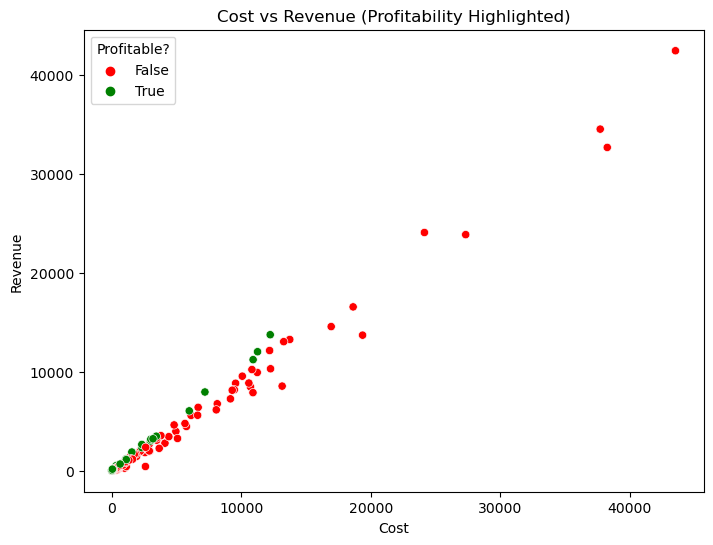

In [15]:
# Scatter: Cost vs Revenue (colored by P&L sign)
plt.figure(figsize=(8,6))
sns.scatterplot(data=paid_search, x="Cost", y="Revenue",
                hue=paid_search["P&L"] > 0, palette={True:"green", False:"red"})
plt.title("Cost vs Revenue (Profitability Highlighted)")
plt.xlabel("Cost")
plt.ylabel("Revenue")
plt.legend(title="Profitable?")
plt.show()

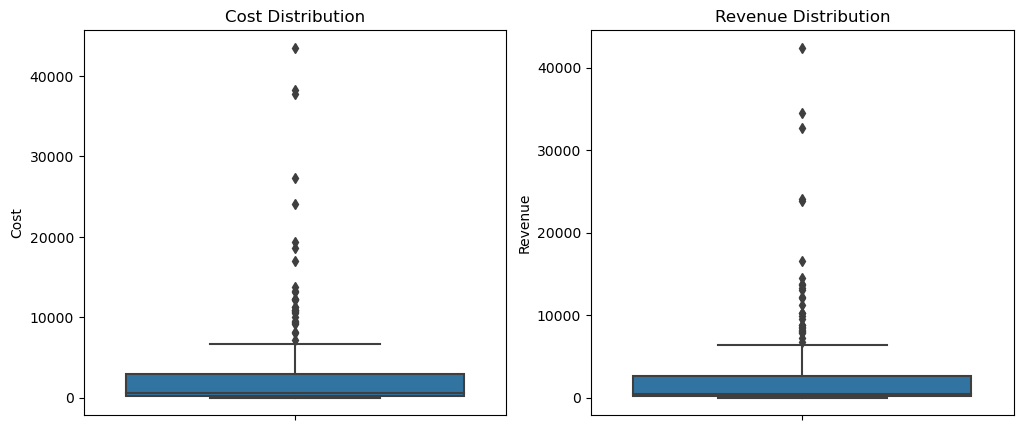

In [16]:
# Boxplots for outlier check
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=paid_search["Cost"])
plt.title("Cost Distribution")

plt.subplot(1,2,2)
sns.boxplot(y=paid_search["Revenue"])
plt.title("Revenue Distribution")
plt.show()

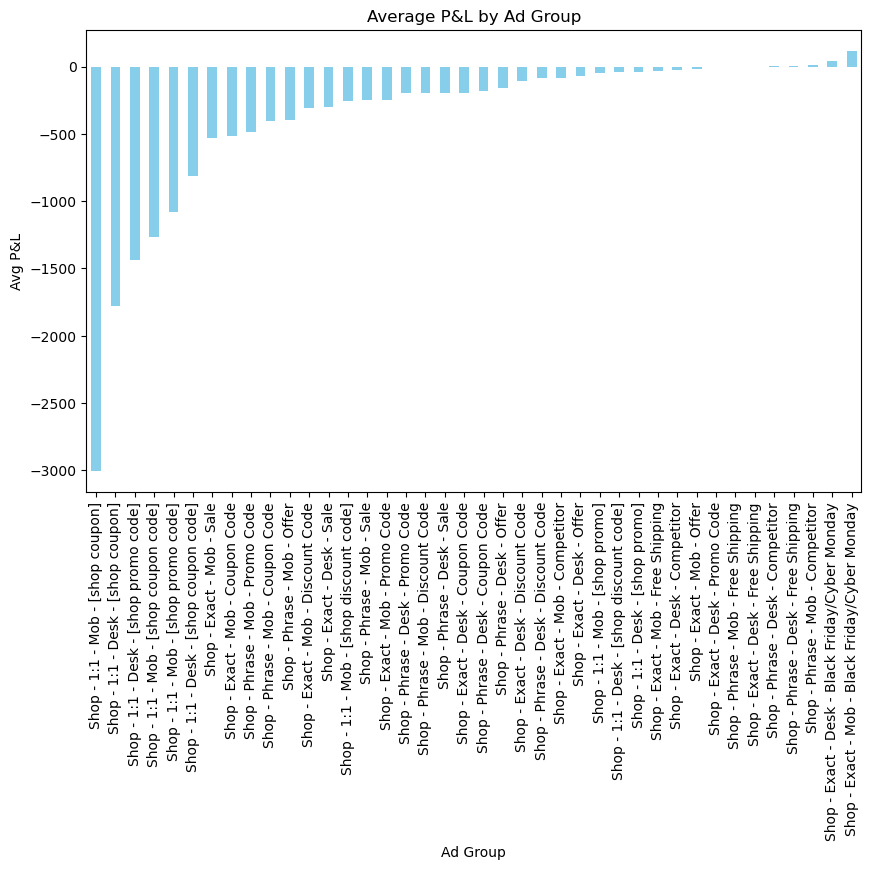

In [17]:
# Group by Ad Group: Avg P&L
adgroup_pl = paid_search.groupby("Ad Group")["P&L"].mean().sort_values()

plt.figure(figsize=(10,6))
adgroup_pl.plot(kind="bar", color="skyblue")
plt.title("Average P&L by Ad Group")
plt.ylabel("Avg P&L")
plt.show()

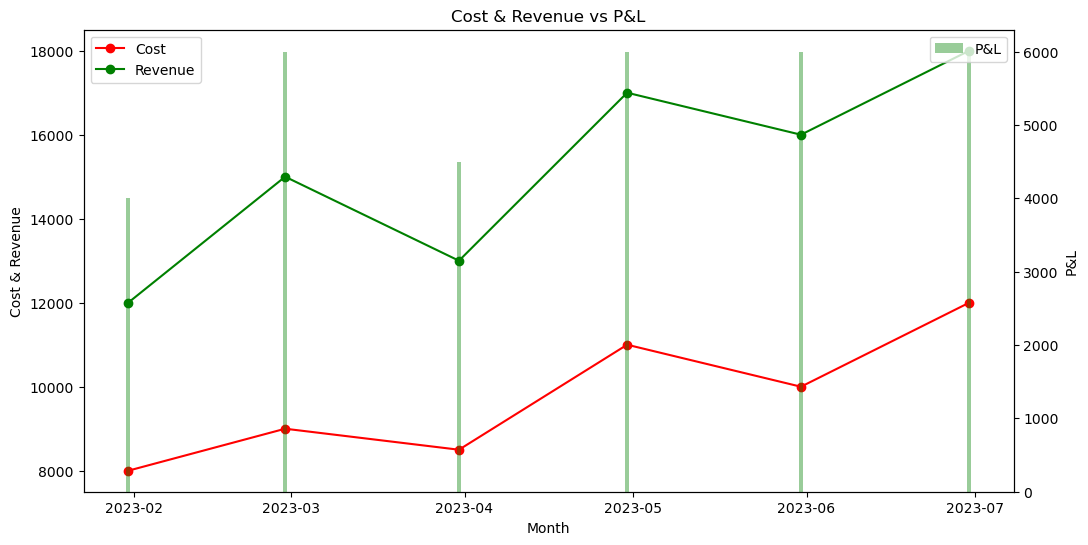

In [18]:
data = {
    "Month": pd.date_range("2023-01-01", periods=6, freq="M"),
    "Revenue": [12000, 15000, 13000, 17000, 16000, 18000],
    "Cost": [8000, 9000, 8500, 11000, 10000, 12000]
}

df = pd.DataFrame(data)
df["P&L"] = df["Revenue"] - df["Cost"]

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot cost & revenue (lines)
ax1.plot(df["Month"], df["Cost"], color="red", marker="o", label="Cost")
ax1.plot(df["Month"], df["Revenue"], color="green", marker="o", label="Revenue")
ax1.set_xlabel("Month")
ax1.set_ylabel("Cost & Revenue")
ax1.legend(loc="upper left")

# Plot P&L (bars) on secondary axis
ax2 = ax1.twinx()
colors = df["P&L"].apply(lambda x: "green" if x >= 0 else "red")
ax2.bar(df["Month"], df["P&L"], color=colors, alpha=0.4, label="P&L")
ax2.set_ylabel("P&L")
ax2.legend(loc="upper right")

plt.title("Cost & Revenue vs P&L")
plt.show()

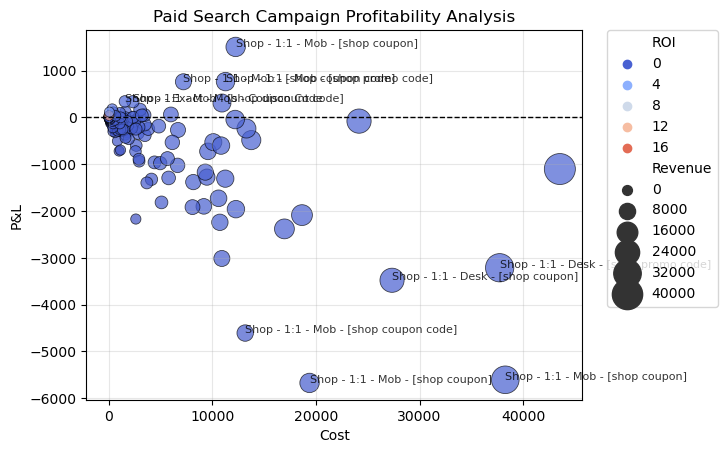

In [19]:
# Scatter plot with ROI as hue and Revenue as size
sns.scatterplot(
    data=paid_search,
    x='Cost',
    y='P&L',
    hue='ROI',
    palette='coolwarm',
    size='Revenue',
    sizes=(50, 500),
    alpha=0.7,
    edgecolor='k'
)

# Highlight top 5 and bottom 5 campaigns
top_bottom = pd.concat([top_campaigns, bottom_campaigns])
for i, row in top_bottom.iterrows():
    plt.text(row['Cost'], row['P&L'], row['Ad Group'], fontsize=8, alpha=0.8)

plt.title('Paid Search Campaign Profitability Analysis')
plt.xlabel('Cost')
plt.ylabel('P&L')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # break-even line
plt.grid(True, alpha=0.3)

# Remove plt.colorbar() — Seaborn adds legend automatically
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # optional: move legend outside

plt.show()

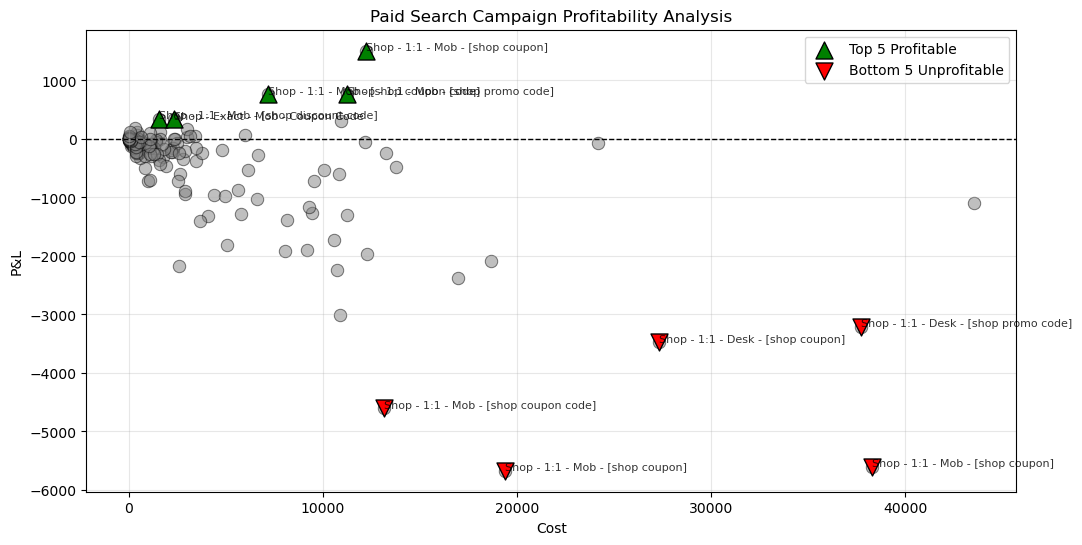

In [20]:
plt.figure(figsize=(12, 6))

# Plot all campaigns as grey circles
sns.scatterplot(
    data=paid_search,
    x='Cost',
    y='P&L',
    color='grey',
    alpha=0.5,
    s=80,
    edgecolor='k'
)

# Highlight top 5 profitable campaigns
sns.scatterplot(
    data=top_campaigns,
    x='Cost',
    y='P&L',
    color='green',
    s=150,
    marker='^',
    edgecolor='k',
    label='Top 5 Profitable'
)

# Highlight bottom 5 unprofitable campaigns
sns.scatterplot(
    data=bottom_campaigns,
    x='Cost',
    y='P&L',
    color='red',
    s=150,
    marker='v',
    edgecolor='k',
    label='Bottom 5 Unprofitable'
)

# Annotate the highlighted campaigns
for i, row in pd.concat([top_campaigns, bottom_campaigns]).iterrows():
    plt.text(row['Cost'], row['P&L'], row['Ad Group'], fontsize=8, alpha=0.8)

plt.title('Paid Search Campaign Profitability Analysis')
plt.xlabel('Cost')
plt.ylabel('P&L')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # break-even line
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

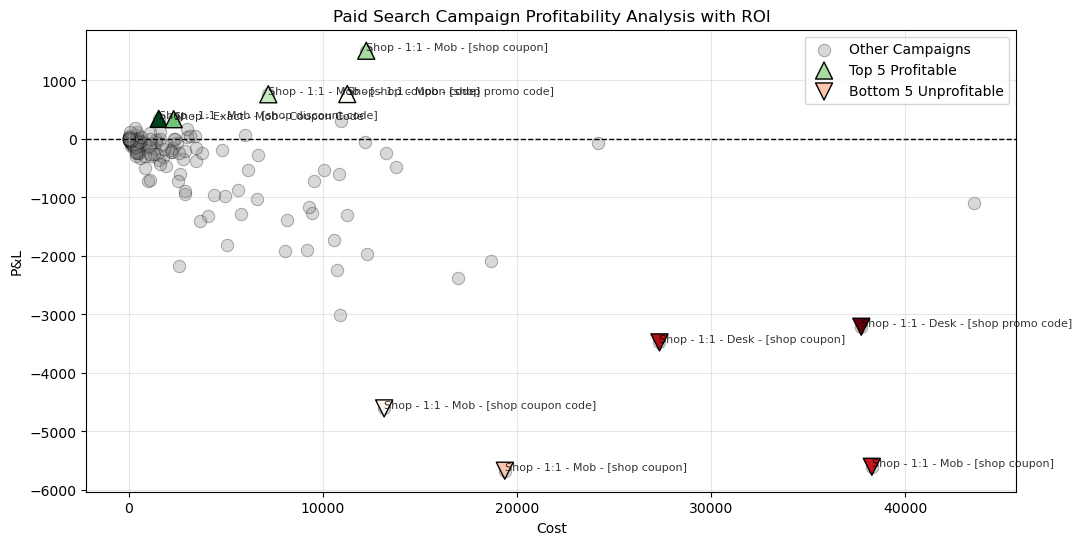

In [21]:
plt.figure(figsize=(12, 6))

# Plot all campaigns as grey circles
sns.scatterplot(
    data=paid_search,
    x='Cost',
    y='P&L',
    color='grey',
    alpha=0.3,
    s=80,
    edgecolor='k',
    label='Other Campaigns'
)

# Normalize ROI for color mapping
from matplotlib.cm import get_cmap
cmap = get_cmap('Greens')
norm_top = (top_campaigns['ROI'] - top_campaigns['ROI'].min()) / (top_campaigns['ROI'].max() - top_campaigns['ROI'].min())
colors_top = [cmap(x) for x in norm_top]

cmap_red = get_cmap('Reds')
norm_bottom = (bottom_campaigns['ROI'] - bottom_campaigns['ROI'].min()) / (bottom_campaigns['ROI'].max() - bottom_campaigns['ROI'].min())
colors_bottom = [cmap_red(x) for x in norm_bottom]

# Highlight top 5 profitable campaigns with ROI color
plt.scatter(top_campaigns['Cost'], top_campaigns['P&L'], 
            color=colors_top, s=150, marker='^', edgecolor='k', label='Top 5 Profitable')

# Highlight bottom 5 unprofitable campaigns with ROI color
plt.scatter(bottom_campaigns['Cost'], bottom_campaigns['P&L'], 
            color=colors_bottom, s=150, marker='v', edgecolor='k', label='Bottom 5 Unprofitable')

# Annotate top/bottom campaigns
for i, row in pd.concat([top_campaigns, bottom_campaigns]).iterrows():
    plt.text(row['Cost'], row['P&L'], row['Ad Group'], fontsize=8, alpha=0.8)

plt.title('Paid Search Campaign Profitability Analysis with ROI')
plt.xlabel('Cost')
plt.ylabel('P&L')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

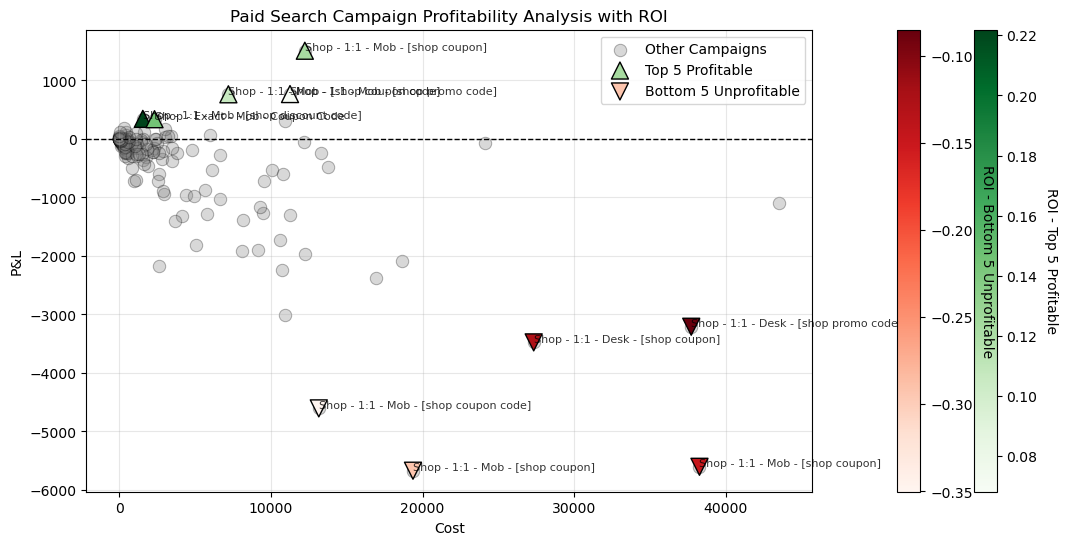

In [22]:
plt.figure(figsize=(12, 6))

# Plot all campaigns as grey circles
sns.scatterplot(
    data=paid_search,
    x='Cost',
    y='P&L',
    color='grey',
    alpha=0.3,
    s=80,
    edgecolor='k',
    label='Other Campaigns'
)

# Normalize ROI for color mapping
norm_top = Normalize(vmin=top_campaigns['ROI'].min(), vmax=top_campaigns['ROI'].max())
norm_bottom = Normalize(vmin=bottom_campaigns['ROI'].min(), vmax=bottom_campaigns['ROI'].max())

# Plot top 5 profitable campaigns (green, ROI gradient)
plt.scatter(top_campaigns['Cost'], top_campaigns['P&L'],
            c=top_campaigns['ROI'], cmap='Greens', s=150, marker='^',
            edgecolor='k', label='Top 5 Profitable')

# Plot bottom 5 unprofitable campaigns (red, ROI gradient)
plt.scatter(bottom_campaigns['Cost'], bottom_campaigns['P&L'],
            c=bottom_campaigns['ROI'], cmap='Reds', s=150, marker='v',
            edgecolor='k', label='Bottom 5 Unprofitable')

# Annotate top/bottom campaigns
for i, row in pd.concat([top_campaigns, bottom_campaigns]).iterrows():
    plt.text(row['Cost'], row['P&L'], row['Ad Group'], fontsize=8, alpha=0.8)

plt.title('Paid Search Campaign Profitability Analysis with ROI')
plt.xlabel('Cost')
plt.ylabel('P&L')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.legend()

# Add colorbars for ROI
sm_top = ScalarMappable(cmap='Greens', norm=norm_top)
sm_top.set_array([])
cbar_top = plt.colorbar(sm_top, fraction=0.046, pad=0.04)
cbar_top.set_label('ROI - Top 5 Profitable', rotation=270, labelpad=15)

sm_bottom = ScalarMappable(cmap='Reds', norm=norm_bottom)
sm_bottom.set_array([])
cbar_bottom = plt.colorbar(sm_bottom, fraction=0.046, pad=0.10)
cbar_bottom.set_label('ROI - Bottom 5 Unprofitable', rotation=270, labelpad=15)

plt.show()

In [ ]:
# PPC: Spend vs Revenue over time
fig_ppc = px.line(ppc, x='Date', y=['Spend','Revenue'], title='PPC: Spend vs Revenue Over Time')
fig_ppc.show()

# Marketing: Conversion Rate by Campaign Type
fig_marketing = px.bar(marketing, x='Campaign_Type', y='Conversion_Rate', color='ROI',
                       title='Marketing: Conversion Rate by Campaign Type')
fig_marketing.show()

# Paid Search: Cost vs P&L with ROI
fig_paid = px.scatter(paid_search, x='Cost', y='P&L', color='ROI', size='Revenue',
                      hover_data=['Ad Group', 'Month'], title='Paid Search: Profitability')
fig_paid.add_hline(y=0, line_dash="dash", line_color="black")  # Break-even line
fig_paid.show()